<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Regression Metrics

_Authors:_ Tim Book, Matt Brems, Riley Dallas, Noelle Brown


> All models are wrong, but some are useful.
>
> -- <cite>George EP Box</cite>

In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# modeling imports
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Load the Data
---

Today's dataset (`Advertising.csv`) is from the [ISLR](https://faculty.marshall.usc.edu/gareth-james/ISL/data.html) website.

Drop `"Unnamed: 0"` once you've loaded the CSV into a DataFrame.

In [2]:
# bring in advertising data
ads = pd.read_csv("datasets/Advertising.csv")
ads.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# drop Unnamed: 0 column
ads.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# # Alternative way to drop (uncomment to run)
# ads.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
# Make sure the change stuck
ads.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Why is "Unnamed: 0" happening?

In [5]:
# Using default settings to save CSV file


,Unnamed: 0,TV,radio,newspaper,sales
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,9.3
3,3,151.5,41.3,58.5,18.5
4,4,180.8,10.8,58.4,12.9


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


(200, 4)

## Data Cleaning
---

Run the following checks in the cells provided:

- Are there any null values (`NaN`)?
- Are there any corrupted columns?



In [10]:
# Check for nulls
ads.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [11]:
# Check datatypes for any corrupted columns
ads.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [12]:
# Do both at the same time with `.info()`
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Create our feature matrix (`X`) and target vector (`y`)
---

The following columns will be our features:

- `'TV'`
- `'radio'`
- `'newspaper'`

The `sales` column is our label: the column we're trying to predict.

In the cell below, create your `X` and `y` variables.

In [13]:
# Three different way to create X:


,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [15]:
# Create y vector


## Linear Regression model
---

In the cell below, create an instance of `LinearRegression`.

In [16]:
# Instantiate


LinearRegression()

In [19]:
# Confirm

<class 'sklearn.linear_model._base.LinearRegression'>
<class 'sklearn.linear_model._base.LinearRegression'>


## Fitting the model
---

The `.fit()` method is how our model will learn the coefficients for each of the features (`'TV'`, `'radio'` and `'newspaper'`).

Once it's fit, you can see the bias (aka intercept) and coefficients are by running:

```python
model.coef_
model.intercept_
```

In [21]:
# fit


LinearRegression()

In [22]:
# coefficients


array([ 0.04576465,  0.18853002, -0.00103749])

In [23]:
# y intercept


2.9388893694594067

## Interpreting Slopes

In [24]:
# coefficients


array([ 0.04576465,  0.18853002, -0.00103749])

In [25]:
# Zip coef_ with the features list


[(0.04576464545539761, 'TV'),
 (0.18853001691820462, 'radio'),
 (-0.0010374930424762972, 'newspaper')]

In [27]:
# Turn it into a data series


TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

In [30]:
# Turn it into a data frame


,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


**Interpretation of coefficients**:
- For every 1 unit increase in TV ads spending (\$1,000), we can expect an increase of 0.045 units in sales (45 products) - ALL OTHER THINGS HELD EQUAL/CONSTANT!  
- For every 1 unit increase in radio ads spending (\$1,000), we can expect an increase of 0.18 units in sales (188 products) - ALL OTHER THINGS HELD CONSTANT!
- For every 1 unit increase in newspaper ads spending, we can expect a decrease of 0.001 units in sales (1 product less) - ALL OTHER THINGS HELD CONSTANT!

## Making predictions
---

To get predictions from our model, all we have to do is run `.predict(X_to_predict)`. This will return a list (`np` array) of predictions, one for each row in our `X_to_predict`. Normally you'll use this method for making predictions on unseen data, but today we'll be evaluating the data that was fed into the model during `.fit()`.

In [32]:
# get predictions from our X data


array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186])

In [33]:
# first row in data


,TV,radio,newspaper
0,230.1,37.8,69.2


In [34]:
# This is what our model predicts for 1st row in data


array([20.52397441])

In [35]:
# Calculate a prediction by hand


20.52397440971517

## Residuals
---

Recall the formula for linear regression:

#### $ Y = \beta_0 + \beta_1 X_1 + \varepsilon$

It's important to remember that $\varepsilon$ represents the irreducible error. Irreducible error is the error we'll never be able to solve. $\varepsilon$ has a few important properties that we want our residuals to mimic:

1. It is random (ie no discernible pattern)
2. It has a mean of zero. Stated differently, our model should be just as likely to undershoot a prediction as it is to overshoot.

![](./imgs/resids.jpeg)
[_image source_](http://www.shodor.org/interactivate/discussions/FindingResiduals/)

In the cells below, do the following:

1. Create your residuals: `y - y_hat`
2. Calculate the mean of your residuals

In [36]:
# calculate residuals


0    1.576026
1   -1.937855
2   -3.007671
3    0.902170
4   -0.288672
5   -5.278348
6    0.070240
7    1.077047
8    1.072659
9   -1.950849
Name: sales, dtype: float64

In [37]:
# mean of residuals


-1.092459456231154e-15

## Residuals plot
---

We'll create a scatterplot to test for randomness. The `y` axis will be the residuals, and the `x` axis will be original `predictions`. 

In a residuals plot, we're looking for the following:

- Scedasticity: We want a consistent variance between our low predictions and our high predictions (homoscedasticity). If you spot the opposite (heteroscedasticity) it means your target is not normally distributed. The remedy is to run your target vector through a power transformation (e.g. [Box-Cox or Yeo-Johnson](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html))
- Outliers: If your loss function involves squaring the residuals (e.g. MSE, RMSE, R2), then outliers will have a lot of leverage over your model. One recommendation is to remove the worst offenders from your training data.

## LINE Assumptions
The assumptions necessary to conduct a proper linear regression are easily remembered by the "LINE" acronym:

* L - Linearity 
* I - Independence (of observations) -> True by assumption 
* N - Normality (of residuals)
* E - Equal variances (of residuals - AKA Homoscedasticity)

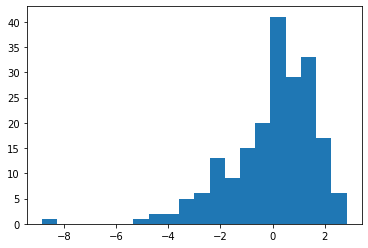

In [39]:
# Normality assumption 


---

This is how an "ideal" resdiuals would look like (below - the scatter plot):

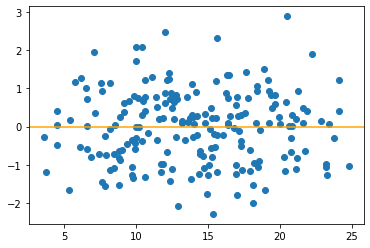

In [41]:
# Use np.random.randn to show what we expect in a residual plot
# create fake residuals


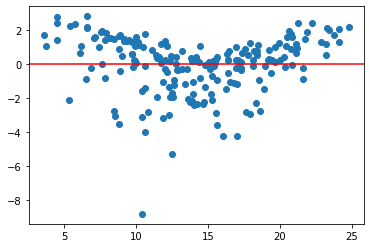

In [42]:
# Let's plot our residuals - check the L and E assumptions


## How do we fix (some) violated assumptions?
Let's check out our slide deck.

## Uh oh - My LINE assumptions are violated. Is all hope lost?

It may sound unintuitive, but probably not! There are two goals of modeling: prediction and inference. If our goal is prediction, our goal is the best error metrics. If we have good error metrics, who can argue with bad assumptions?

That's not to say you should ignore violated assumptions. If you can correct for a violated assumption, you are almost guaranteed to see an improvement in your predictions.

_(If your goal is inference (that is, interpretability), then your assumptions being valid is absolutely crucial. More on this later this week.)_

![](./imgs/jp-meme.png)

## Mean Absolute Error (MAE)
---

$$MAE = \frac{1}{n}\sum_{i=1}^n(|y_i-\hat{y}_i|)$$

Goal: Get MAE as close to 0 as possible.

Pros: 
- Represents median distance from the predicted value.
- In the original units of $Y$. 
- Is not heavily affected by outliers.

Cons: 
- Depends on scale of $Y$. (i.e. housing prices vs. GPA)
- Punishes all errors with same "severity".

In [44]:
# Calcuate MAE by hand


1.2520112296870685

In [45]:
# Via sklearn.metrics


1.2520112296870682

## Sum Squared Error (SSE)
---

$$SSE = \sum_{i=1}^n(y_i - \hat{y}_i)^2$$

SSE forms the basis for several loss/optimization functions that we'll cover next:

- Mean squared error (MSE)
- Root mean squared error (RMSE)
- R2

**NOTE:** Depending on what corner of the internet you're in, the SSE goes by many different names. The most commen other one you'll see is the **residual sum of squres (RSS)**. However, some other sources abbreviate something else RSS. Be careful!

In [46]:
# Calculate RSS by hand


556.8252629021872

## Mean Squared Error (MSE)
---

$$MSE = \frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Goal: Get $MSE$ as close to 0 as possible.

Pros: 
- Very common; part of other calculations.
- Represents average distance squared from the predicted value.
- Punishes outliers severely.
- Coincides directly with the metric used to fit OLS model.

Cons: 
- Can be heavily affected by outliers.
- Not in the original units of $Y$.
- Depends on scale of $Y$. (i.e. housing prices vs. GPA)
- Uninterpretable to humans

In [47]:
# MSE by hand


2.784126314510936

In [48]:
# MSE using sklearn


2.784126314510936

## Root Mean Squared Error (RMSE)
---

$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Goal: Get $RMSE$ as close to 0 as possible.

Pros: 
- Pretty common.
- Represents (approximately) average distance from the predicted value.
    - Looks similar to standard deviation.
- In the original units of $Y$.

Cons: 
- Can be heavily affected by outliers.
- Depends on scale of $Y$. (i.e. housing prices vs. GPA)
- Only a _little_ interpretable.

In [49]:
# RMSE - using MSE and taking the square root of that


1.6685701407225697

In [50]:
# RMSE - without using NumPy
# squared=False gives us the square root

1.6685701407225697

### Comparison of Loss Functions

In [51]:
# Example true and predicted values


MAE is: 2.0
MSE is: 7.5
RMSE is: 2.7386127875258306


## Coefficient of Determination, $R^2$
---

$$R^2 = \frac{\text{Explained Variance}}{\text{Total Variance}} = 1 - \frac{\text{Model Error}}{\text{Total Variance}} = 1 - \frac{\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\sum_{i=1}^n(y_i - \bar{y})^2}$$

Goal: Get $R^2$ as close to 1 as possible.

> - score = 0: Model explains none of the variability of the response data around its mean.
> - score = 1: Model explains all the variability of the response data around its mean.

Pros:
- Easy interpretation. "An $R^2$ value of 0.8 means that 80% of the variability in _y_ is explained by the _x_-variables in our model."
- Common metric.
- Does not depend on the scale of $Y$.
- Works with more than just _linear_ regression.

Cons:
- As you add more variables, $R^2$ will never decrease (with linear regression). [Adjusted $R^2$](https://www.statisticshowto.com/adjusted-r2/) can handle this assumption better.
- **ONLY INTERPRETABLE WITH LINEAR REGRESSION!**
- Outside linear regression values outside 0 and 1 are possible.

> Are low $R^2$ scores bad?
>
> I'm glad you asked! Not everything in regression is about getting the best predictions. In some fields, such as human behavior, you would expect to achieve scores much lower then 50\%! For inference, perhaps 0.3 is enough to measure an effect! Yes, there is more to machine learning than prediction. Inference can be the goal as well!

[Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)

In [52]:
# Null prediction


14.022500000000003

In [53]:
# Null residuals


0       8.0775
1      -3.6225
2      -4.7225
3       4.4775
4      -1.1225
        ...   
195    -6.4225
196    -4.3225
197    -1.2225
198    11.4775
199    -0.6225
Name: sales, Length: 200, dtype: float64

In [54]:
# Null sum of squares


5417.14875

In [56]:
# R2 by hand


0.8972106381789522

In [57]:
# R2 from sklearn


0.8972106381789522

In [58]:
# R2 from model


0.8972106381789522

**Interpretation** - ?